## PRACTICAL QUIZ II(CAT II)Assignment

Assignment Title: Exploratory Data Analysis and Visualization with Pandas and Seaborn

Total Marks: 20

Instructions: Download the datasets as indicated below.

Perform the required data analysis and visualizations using Pandas and Seaborn.
Submit your work in a Jupyter Notebook or Colab Notebook format.
Rename your notebook file as: LastName_FirstName_Pandas_Seaborn_Assignment.ipynb
Ensure your notebook has well-formatted Markdown cells for explanation and interpretation.

Show all outputs clearly.

Dataset Source:
Download the following dataset:

Netflix Movies and TV Shows Dataset(download in kaggle)

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part A: Data Cleaning and Preprocessing (5 Marks)

1. Load the dataset and display the first 5 rows.
2. Check for missing values and handle them appropriately. Briefly explain your choices.
3. Convert the date_added column to datetime format.
4. Create a new column release_year_group by grouping the release_year into bins (e.g., before 2000, 2000–2009, 2010–2015, 2016–2020, 2021–2023).

In [2]:
# 1. load dataset and display first  5 rows
netflix_df=pd.read_csv('netflix_titles.csv')
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# check missing values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# proportion of missing values
missing=(netflix_df.isna().sum()/netflix_df.shape[0])*100
missing[missing>0]

director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

#### Handling missing values
- director column has about 29.9% missing, fill with 'Unknown'
- cast column has about 9.4% missing, fill with 'Not Available'
- country also has about 9.4% missing, fill with 'Not Specified'
- date_added column has about 0.1% missing, fill with mode (most frequent date).
- rating column has about 0.04% missing (drop) while duration column has about 0.03% missing (drop)

In [5]:
# creating a copy
netflix = netflix_df.copy()

In [6]:
netflix.fillna({
    'director': 'Unknown',
    'cast': 'Not Available',
    'country': 'Not Specified',
    'date_added': netflix['date_added'].mode()[0]
}, inplace=True)

In [7]:
netflix.dropna(subset=['rating', 'duration'], inplace=True)

In [8]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Convert the date_added column to datetime format
netflix['date_added'] = netflix['date_added'].str.strip()
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%B %d, %Y')

In [10]:
netflix['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8800, dtype: datetime64[ns]

In [11]:
#Create a new column release_year_group by grouping the release_year into bins
labels = ['before 2000', '2000–2009', '2010–2015', '2016–2020', '2021–2023']
bins = [0, 1999, 2009, 2015, 2020, 2023]

In [12]:
# Create new column
netflix['release_year_group'] = pd.cut(netflix['release_year'], bins=bins, labels=labels)

In [13]:
netflix['release_year_group'].unique()

['2016–2020', '2021–2023', 'before 2000', '2010–2015', '2000–2009']
Categories (5, object): ['before 2000' < '2000–2009' < '2010–2015' < '2016–2020' < '2021–2023']

In [14]:
# Collect all country entries that contain multiple countries
com=[]
for country in netflix['country']:
    if len(country.split(','))>1:
        com.append(country)
com.pop()

'United Arab Emirates, Jordan'

In [15]:
# split on ', ' into lists
netflix['country'] = netflix['country'].str.split(',')

In [16]:
# explode into separate rows
netflix_clean = netflix.explode('country')

In [17]:
# clean up
netflix_clean['country'] = netflix_clean['country'].str.strip()
netflix=netflix_clean.copy()

In [18]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2016–2020
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021–2023
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021–2023
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Not Specified,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021–2023
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021–2023


## Part B: Exploratory Data Analysis with Pandas (7 Marks) 
1. How many shows are available in total, and how many are movies vs TV shows?
2. What are the top 5 countries producing the most Netflix content?
3. Which director has the most content on Netflix?
4. Show the yearly trend of content added on Netflix from 2010 to 2023.
5. Analyze the average duration of movies per year from 2010 to 2023.
6. Plot this using a line chart. Find out which genres (listed_in) are most common for movies and for TV shows.

In [19]:
# number of shows and movies
print(f'There {netflix['type'].shape[0]} total shows available, out of which {netflix['type'].value_counts()['Movie']} are movies while {netflix['type'].value_counts()['TV Show']} are TV shows')

There 10843 total shows available, out of which 7814 are movies while 3029 are TV shows


In [20]:
# top countries producing netflix content
netflix_country=netflix[netflix['country']!='Not Specified']
netflix_country['country'].value_counts().sort_values(ascending=False).head(5).index

Index(['United States', 'India', 'United Kingdom', 'Canada', 'France'], dtype='object', name='country')

In [21]:
# Which director has the most content on Netflix
netflix_director=netflix[netflix['director']!='Unknown']
top_director = netflix_director['director'].value_counts().idxmax()
print(top_director)

Rajiv Chilaka


In [22]:
# Show the yearly trend of content added on Netflix from 2010 to 2023.
# extract year
netflix['year_added'] = netflix['date_added'].dt.year

# group by year and count
yearly_trend = netflix['year_added'].value_counts().sort_index()

# filter 2010–2023
yearly_trend = yearly_trend.loc[2010:2023]

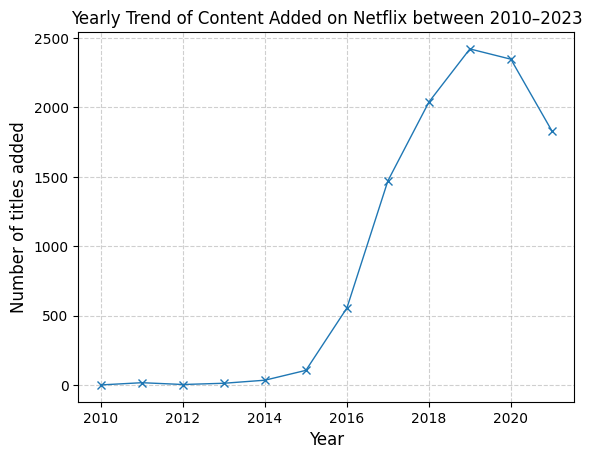

In [23]:
# plot
plt.plot(yearly_trend.index, yearly_trend.values, marker='x', linestyle='-', linewidth=1)

plt.title('Yearly Trend of Content Added on Netflix between 2010–2023', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of titles added', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show();

In [24]:
# Analyze the average duration of movies per year from 2010 to 2023
movies=netflix[netflix['type']=='Movie'].copy()
movies['duration']=movies['duration'].str.replace('min', '').astype(float)

In [25]:
avg_duration=movies.groupby('release_year')['duration'].mean()
avg_df=avg_duration.loc[2010:2023]
avg_df

release_year
2010    105.093458
2011    101.288660
2012    100.969697
2013    100.256757
2014    100.623377
2015    101.042435
2016     95.818907
2017     96.508230
2018     96.923316
2019     94.120577
2020     92.711504
2021     96.948882
Name: duration, dtype: float64

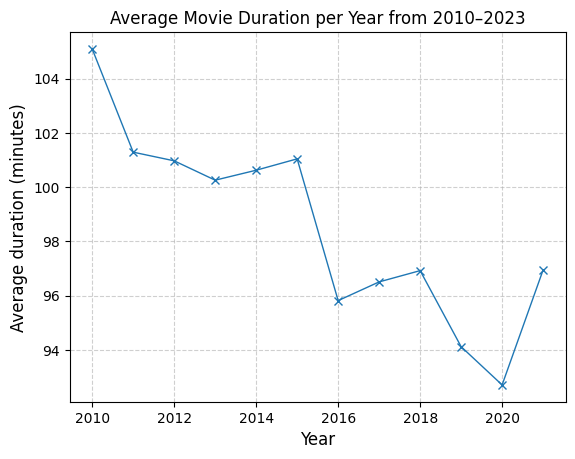

In [26]:
# plot
plt.plot(avg_df.index, avg_df.values, marker='x', linestyle='-', linewidth=1)

plt.title('Average Movie Duration per Year from 2010–2023', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average duration (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show();

In [27]:
# Plot this using a line chart. Find out which genres (listed_in) are most common for movies and for TV shows.

# make copy
netflix_genres = netflix.copy()

In [28]:
# split genres into list
netflix_genres['listed_in'] = netflix_genres['listed_in'].str.split(', ')
netflix_genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2016–2020,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021–2023,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021–2023,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Not Specified,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021–2023,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021–2023,2021


In [29]:
# explode into separate rows
netflix_genres = netflix_genres.explode('listed_in')
netflix_genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2016–2020,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021–2023,2021


In [30]:
# group by type and genre, then count
genre_counts = netflix_genres.groupby(['type', 'listed_in']).size().reset_index(name='count')
genre_counts.head()

,type,listed_in,count
0,Movie,Action & Adventure,1182
1,Movie,Anime Features,78
2,Movie,Children & Family Movies,845
3,Movie,Classic Movies,152
4,Movie,Comedies,1981


In [31]:
# pivot so we have Movies and TV Shows side by side
pivot_genres = genre_counts.pivot(index='listed_in', columns='type', values='count').fillna(0)
pivot_genres.head()

type,Movie,TV Show
listed_in,,
Action & Adventure,1182.0,0.0
Anime Features,78.0,0.0
Anime Series,0.0,191.0
British TV Shows,0.0,306.0
Children & Family Movies,845.0,0.0


In [32]:
# sort by total counts
pivot_genres['total'] = pivot_genres.sum(axis=1)
pivot_genres = pivot_genres.sort_values('total', ascending=False).head(10)
pivot_genres

type,Movie,TV Show,total
listed_in,,,
International Movies,3513.0,0.0,3513.0
Dramas,3201.0,0.0,3201.0
Comedies,1981.0,0.0,1981.0
International TV Shows,0.0,1464.0,1464.0
Action & Adventure,1182.0,0.0,1182.0
Documentaries,1118.0,0.0,1118.0
Independent Movies,1040.0,0.0,1040.0
TV Dramas,0.0,852.0,852.0
Children & Family Movies,845.0,0.0,845.0


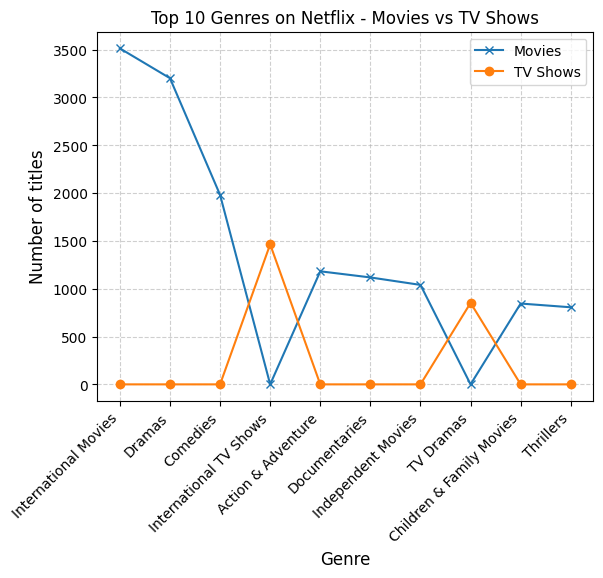

In [33]:
# line chart
plt.plot(pivot_genres.index, pivot_genres['Movie'], marker='x', label='Movies')
plt.plot(pivot_genres.index, pivot_genres['TV Show'], marker='o', label='TV Shows')

plt.title('Top 10 Genres on Netflix - Movies vs TV Shows', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show();

### Part C: Visualization with Seaborn (8 Marks) 
1. Create a countplot showing the distribution of type (Movie or TV Show) across different countries.
2. Limit to the top 10 countries. Create a bar plot of the top 10 genres (listed_in) with the most shows on Netflix.
3. Plot a boxplot showing the variation in movie durations by release year group.
4. Create a heatmap showing the number of contents added per year per content type (pivoted by date_added.year and type)

In [34]:
# top 10 countries by content count
countries = netflix[netflix['country']!='Not Specified']
top_countries = countries['country'].value_counts().head(10).index
df_countries = netflix[netflix['country'].isin(top_countries)]
df_countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2016–2020,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021–2023,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021


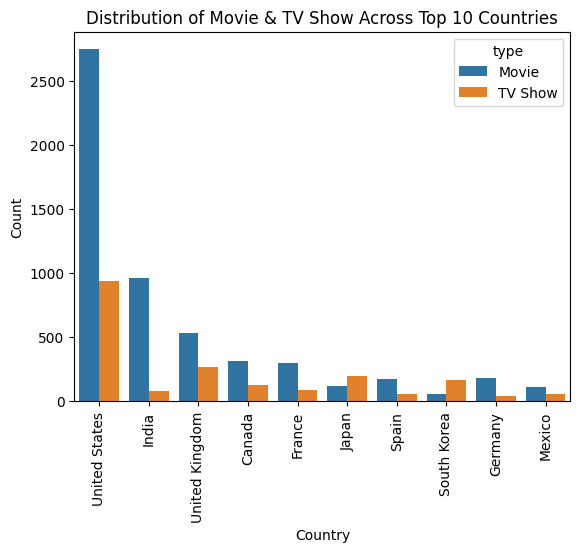

In [35]:
# count plot
sns.countplot(data=df_countries, x='country', hue='type', order=top_countries)
plt.xticks(rotation=90)
plt.title('Distribution of Movie & TV Show Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show();

In [36]:
# Limit to the top 10 countries. Create a bar plot of the top 10 genres (listed_in) with the most shows on Netflix.
df_genres = netflix_genres[netflix_genres['listed_in'] != '']
df_genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2016–2020,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021–2023,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021–2023,2021


In [37]:
# top 10 genres
top_genres = df_genres['listed_in'].value_counts().head(10)
top_genres

listed_in
International Movies        3513
Dramas                      3201
Comedies                    1981
International TV Shows      1464
Action & Adventure          1182
Documentaries               1118
Independent Movies          1040
TV Dramas                    852
Children & Family Movies     845
Thrillers                    806
Name: count, dtype: int64

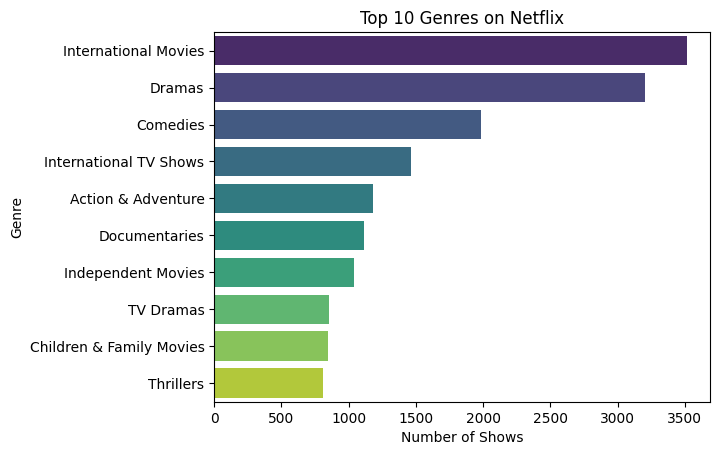

In [38]:
# barplot
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', hue=top_genres.index, legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.show();

In [39]:
# Plot a boxplot showing the variation in movie durations by release year group.
# Filter only movies
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_year_group,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2016–2020,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Not Specified,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021–2023,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",before 2000,2021


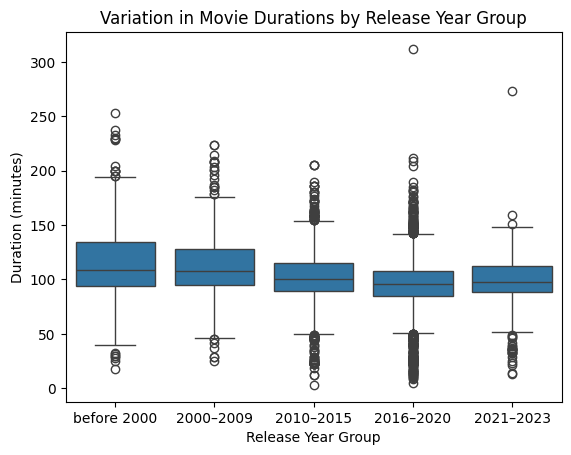

In [40]:
# box plot
sns.boxplot(data=movies, x='release_year_group', y='duration')
plt.title('Variation in Movie Durations by Release Year Group')
plt.xlabel('Release Year Group')
plt.ylabel('Duration (minutes)')
plt.show();

In [41]:
# Create a heatmap showing the number of contents added per year per content type (pivoted by date_added.year and type)
pivot_table = netflix.pivot_table(index='year_added', columns='type', values='show_id', aggfunc='count')
pivot_table

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,17.0,NaN
2012,4.0,NaN
2013,6.0,7.0
2014,26.0,9.0
2015,73.0,33.0
2016,332.0,223.0


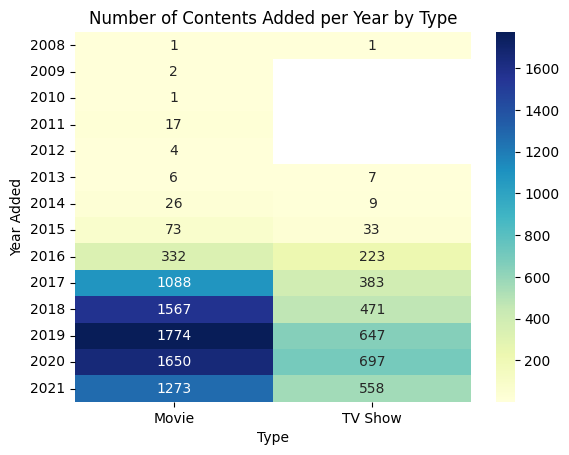

In [42]:
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Number of Contents Added per Year by Type')
plt.xlabel('Type')
plt.ylabel('Year Added')
plt.show();